## Monfractal signals: White noise, fractional gaussian noise and brownian motion

The Hurst exponent is a generic property of random walks and Brownian motions, which are defined also as monofractal signals for the concepts of self-similarity and fractality explained in the first tutorial. In this notebook, we delve into the estimation of the Hurst exponents for the fGN and fBM and its relationship with the power spectrum.  

**Hurst exponent and brownian motion**

We defined fractional Brownian motion (fBM) as a cumulative sum of sequence $\eta_i$, i.e. $B(t) = \sum^{t}_{i=0}\eta_i$, known also as random walk. The variable $\eta_i$ is considered an instantaneous increment and the sequence of increments is defined as fractional Guassian noise (fGn). The mean-square displacement of the fBm and its derivative (fGn) have the following asymptotic behavior:   
$$<|B(t) - B(t0)|>^2 \sim |t-t_0|^{2H} = |t-t_0|^{2-d}$$
where H is the Hurst Exponent and d is the geometrical dimension of the time series obtianed via box counting. 

**Detrend fluctuation analysis**

The DFA derives the Hurst exponent by means of the fluctuations function $F(n)$ , which is calculated as follows:
1. The cumulative process of the time series $x(t)$ is derived by summing the successive deviations from the mean $<x>$:
$Y(t) = \sum^t_{t'=1}(x(t') - <x>) $
2. The cumulative process $Y(t)$ is divided in non-overlapping windows of length $n$ for a total count of $N_n=\frac{N}{n}$, where $N$ is the length of $x(t)$.
3. In each interval, a polynomial trend $Y^{fit}_s(i)$ is then fitted for each interval $s$ of length $n$ (e.g. a linear trend ) and $F^2(n,s)=\sum^n_{i=1}[(Y((s-1)n+i))-Y^{fit}_{s}(i)]^2$
4. The fluctuation functions is then computed as: $$F^2(n)=[\frac{1}{N_n}\sum^{N_n}_{s=1}F^2(n,s)]^{1/2},$$ which is expected to scale as $n^H$, i.e. $F^2(n)\sim n^{H}$. Threfore, one can estimate $H$ by compute the slope of $F(n)$ in a log-log graph, i.e. $\log_2(F^2(n))\sim H\log_2{n}$.

**Persistency classification by the Hurst Exponent**

1. $H \in [0.0, 0.5)$ --> anti-persistency. The process under study is anti-persistent and tends
to decrease (increase) after a previous increase (decrease). An anti-persistent process
appears very noisy;
2. $ H = 0.5 $ --> uncorrelated process;
3. $ H \in (0.5, 1.0]$--> persistency. If a process has been increasing (decreasing) for a period
T, then it is expected to continue to increase (decrease) for a similar period. Persistent
processes show long-range correlations and exhibit relatively little noise;
4. $H > 1.0$ --> nonstationary process, stronger long-range correlations are present. However, when this is the case, you cannot have the overlap with the strange attractor (the Hurst exponent must be below 1, $H < 1.0$)

## Import packages

In [1]:
import numpy as np
import scipy as sp
from src import py_msent
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import math
import os
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nolds


## White noise

In [2]:
WD_PATH = os.path.dirname(os.getcwd())
print(WD_PATH)
separator    = ''
fractal_path = separator.join([WD_PATH,'/data/external/fathon_test'])
print(fractal_path)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis
/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/data/external/fathon_test


In [3]:
wn = np.loadtxt(separator.join([fractal_path,'/whitenoise.txt']))
wn.shape[0]

8000

## Sample Entropy

The Sample Entropy of a white noise process is normally higher than sample entropy of the Henon Map.

In [4]:
sd_x       = np.std(wn, ddof=1)
nolds.sampen(wn, emb_dim=1, tolerance= 0.2*sd_x)

2.1825314118796038

## Hurst exponent

Estimation of the Hurst Exponent via Fathon

In [5]:
nMin = 8
nMax = 2**10
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [6]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [7]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [8]:
H,n_w,F_w = test_mat_dfa_lorenz(wn)
print(H)

0.46920532119536806


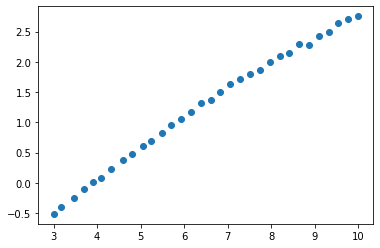

In [9]:
plt.scatter(np.log2(n_w), np.log2(F_w))

## Spectrum Slope

The white noise is by definition a fractional gaussian noise. According to https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0136661, the PSD $\gamma(f)$ of fGN decays exponentially with a scaling parameter linked to $H$:
$$\gamma(f) \sim C|f|^{-\beta} = C|f|^{-(2H-1)}$$.

Therefore, one can estimate the $H$ by looking the spectral decay by considering a log-log plot, i.e. $\log(\gamma(f))\sim \beta\log{f}$, and applying the following formulas:

$$\beta = (2H - 1)$$
$$H = (\beta + 1)/2$$

In [10]:
from scipy.signal import welch

NSEG     = (wn.shape[0] + 1)/10
NSEG_OV  = np.round(NSEG*0.5)
f,PX = welch(wn, fs=1, window='hann', nperseg=NSEG, noverlap=NSEG_OV, nfft=None)

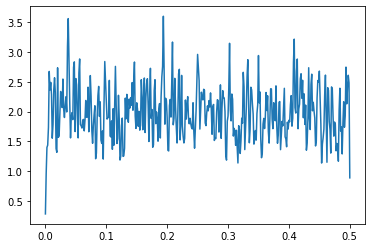

In [11]:
plt.plot(f,PX)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


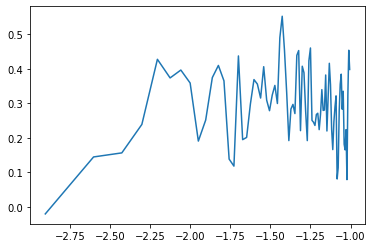

In [12]:
f_loc  = np.where(f<0.1)[0]
plt.plot(np.log10(f[f_loc]),np.log10(PX[f_loc]))

In [13]:
beta, _ = np.polyfit(np.log10(f[f_loc[1:]]),np.log10(PX[f_loc[1:]]), 1)
print(beta)

0.036136265453128515


In [14]:
hurst_beta = (beta*(-1)+1)/2
print(hurst_beta)

0.48193186727343573


## Fractional Gaussian Noise: Hurst exponent and Spectrum Slope

In [15]:
N_wn_frac = 3000
wn_frac   = nolds.fgn(N_wn_frac, H=0.75)

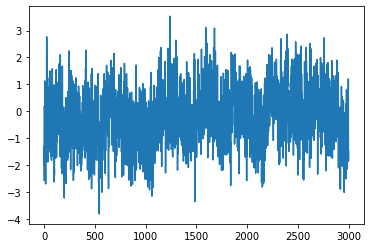

In [16]:
plt.plot(wn_frac)

The estimation of the Hurst exponent is based on the relationship between the $B(t)$ increments and the considered time scale. On top of that, the DFA assumes that you need to reconstruct the cumulative process before extimating X. Therefore, we derived the signal fGN as it is (without further preprocessing).

Estimation of the Hurst Exponent via Fathon

In [17]:
nMin = 8
nMax = 2**8
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [18]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [19]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [20]:
H,n_w,F_w = test_mat_dfa_lorenz(wn_frac)
print(H)

0.7914088722688013


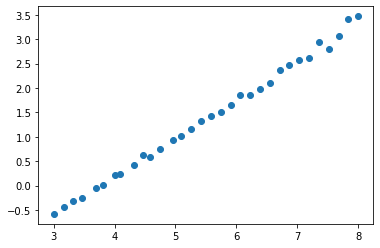

In [21]:
plt.scatter(np.log2(n_w), np.log2(F_w))

In [22]:
from scipy.signal import welch

NSEG     = (N_wn_frac + 1)/20
NSEG_OV  = np.round(NSEG*0.5)
f,PX = welch(wn_frac, fs=1, window='hann', nperseg=NSEG, noverlap=NSEG_OV, nfft=None)

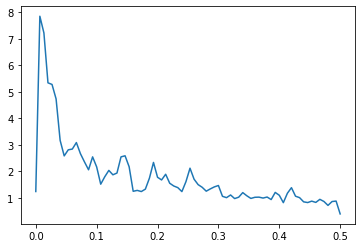

In [23]:
plt.plot(f,PX)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


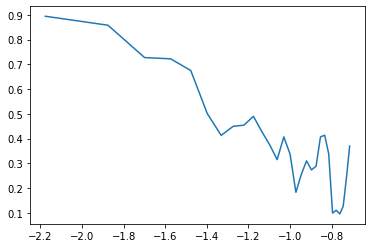

In [24]:
f_loc  = np.where(f<0.2)[0]
plt.plot(np.log10(f[f_loc]),np.log10(PX[f_loc]))

In [25]:
beta, _ = np.polyfit(np.log10(f[f_loc[1:]]),np.log10(PX[f_loc[1:]]), 1)
print(beta*(-1))

0.524938497657226


In [26]:
beta_hurst = (2*H-1)
print(beta_hurst)

0.5828177445376026


In [27]:
hurst_beta = (beta*(-1)+1)/2
print(hurst_beta)

0.762469248828613


## Fractional Brownian Motion: Hurst exponent and Spectrum Slope

In [28]:
N_bm_frac = 4000
bm_frac   = nolds.fbm(N_bm_frac, H=0.75)

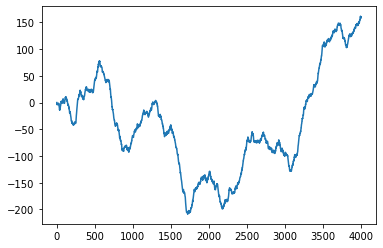

In [29]:
plt.plot(bm_frac)

The estimation of the Hurst exponent is based on the relationship between the $B(t)$ increments and the considered time scale. On top of that, the DFA assumes that you need to reconstruct the cumulative process before extimating X. Therefore, we derived the derivative of fBM (which is a fGN).

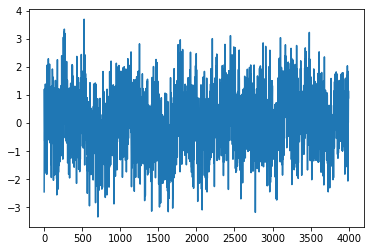

In [30]:
plt.plot(np.diff(bm_frac))

Estimation of the Hurst Exponent via Fathon

In [31]:
nMin = 16
nMax = 2**10
nScales = 32
exponents = np.linspace(np.log2(nMin), np.log2(nMax), nScales)
scales = np.round(np.power(2.0, exponents)).astype(np.int64)
q_list = [-5, -3, -1, 1, 3, 5]

In [32]:
def get_idxs(vec, scales):
    idxs = []
    for s in scales:
        idxs.append(np.where(vec==s)[0][0])
    return idxs

In [33]:
def test_mat_dfa_lorenz(x):
    x_dfa = fathon.DFA(fu.toAggregated(x))
    n_w, F_w = x_dfa.computeFlucVec(scales, revSeg=False, polOrd=1)
    idxs = get_idxs(n_w, scales)
    n_w = n_w[idxs]
    F_w = F_w[idxs]
    H, _ = np.polyfit(np.log2(n_w), np.log2(F_w), 1)
    return H,n_w,F_w

In [34]:
H,n_w,F_w = test_mat_dfa_lorenz(np.diff(bm_frac))
print(H)

0.8620433543052495


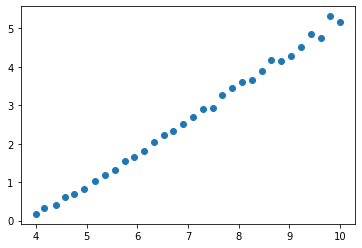

In [35]:
plt.scatter(np.log2(n_w), np.log2(F_w))

In [36]:
from scipy.signal import welch

NSEG     = (N_bm_frac + 1)/20
NSEG_OV  = np.round(NSEG*0.5)
f,PX = welch(np.diff(bm_frac), fs=1, window='hann', nperseg=NSEG, noverlap=NSEG_OV, nfft=None)

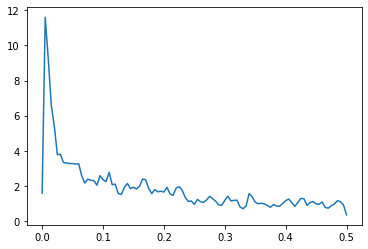

In [37]:
plt.plot(f,PX)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


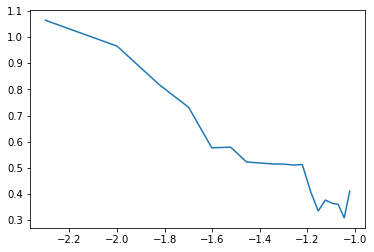

In [38]:
f_loc  = np.where(f<0.1)[0]
plt.plot(np.log10(f[f_loc]),np.log10(PX[f_loc]))

In [39]:
beta, _ = np.polyfit(np.log10(f[f_loc[1:]]),np.log10(PX[f_loc[1:]]), 1)
print(beta*(-1))

0.5843836321061143


In [41]:
beta_hurst = (2*H-1)
print(beta_hurst)

0.724086708610499
